In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import tensorflow_probability as tfp

In [4]:
#read the csv file
df_train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')

In [5]:
df_train.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hardness', ylabel='Count'>

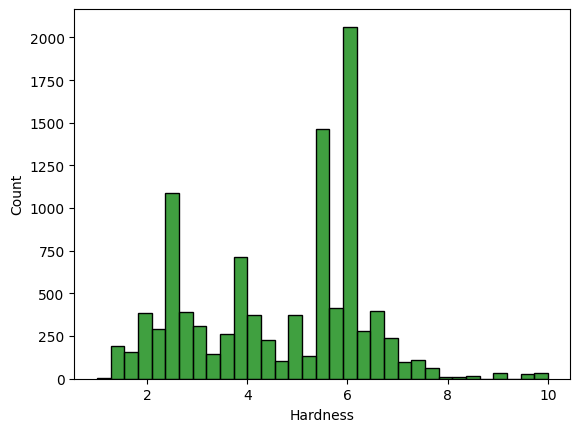

In [8]:
sns.histplot(df_train.Hardness,color='green')

<Axes: >

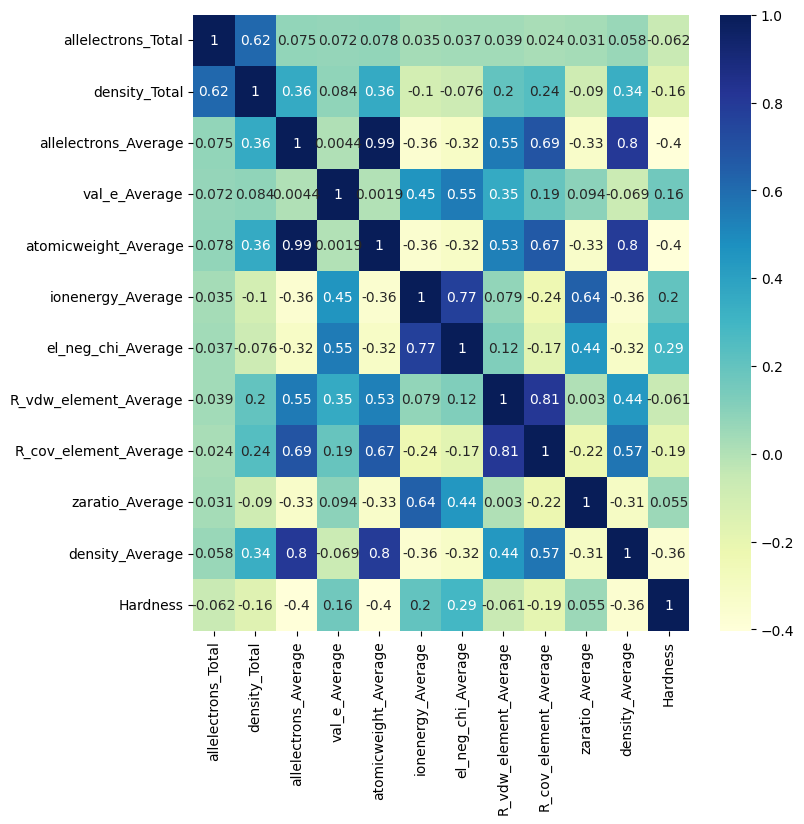

In [9]:
plt.figure(figsize =(8,8))
cor_matrix = df_train.drop(columns=['id']).corr()
sns.heatmap(cor_matrix, annot= True,cmap= 'YlGnBu')

In [10]:
features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
            'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
            'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
            'zaratio_Average', 'density_Average', 'Hardness']

In [11]:
X= df_train[features].drop(columns = 'Hardness')
y= df_train.Hardness

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=42)

In [13]:
hgb_params = {
    'learning_rate': 0.1, 
    'loss': 'absolute_error', 
    'max_depth': None, 
    'max_iter': 100, 
    'max_leaf_nodes': 35
}

rf_params = {
    'max_depth': None, 
    'max_leaf_nodes': None, 
    'min_samples_leaf': 2, 
    'min_samples_split': 2, 
    'n_estimators': 150,
    'criterion': 'absolute_error'
}

cb_params = {
    'verbose': 0, 
    'loss_function': 'MAE', 
    'l2_leaf_reg': 0.4, 
    'iterations': 1200
}

In [14]:
model_pre = LGBMRegressor()
# model_pre = HistGradientBoostingRegressor(**hgb_params)
model_pre.fit(X, y)
X_new = X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

In [15]:
def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

In [16]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True)
] 

In [17]:
model_pre.feature_name_


['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [18]:
def create_model():
    
    input_layer = tf.keras.Input(shape=(len(features)-1+1, ))
    
    x = tf.keras.layers.BatchNormalization()(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
#     x = tf.keras.layers.Dense(64, activation='relu')(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
    
    output_layer = tf.keras.layers.Dense(1)(x)    
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=loss_fn,
                  metrics=metric_fn)
    
    return model

model = create_model()
history = model.fit(X_new, y,
                    epochs=100,
#                     batch_size=64,
                    class_weight=model_pre.class_weight,
                    callbacks=callbacks_list,
                    validation_split=0.2)

Epoch 1/100
261/261 [==============================] - 9s 6ms/step - loss: 2.4675 - metric_fn: 4.8530 - val_loss: 1.7732 - val_metric_fn: 4.5796
Epoch 2/100
261/261 [==============================] - 1s 5ms/step - loss: 0.8981 - metric_fn: 3.5439 - val_loss: 0.8686 - val_metric_fn: 3.2567
Epoch 3/100
261/261 [==============================] - 1s 5ms/step - loss: 0.8407 - metric_fn: 3.3722 - val_loss: 0.7198 - val_metric_fn: 3.1935
Epoch 4/100
261/261 [==============================] - 1s 5ms/step - loss: 0.7979 - metric_fn: 3.2253 - val_loss: 0.6839 - val_metric_fn: 3.1748
Epoch 5/100
261/261 [==============================] - 1s 5ms/step - loss: 0.7703 - metric_fn: 3.1902 - val_loss: 0.6387 - val_metric_fn: 2.8888
Epoch 6/100
261/261 [==============================] - 1s 5ms/step - loss: 0.7314 - metric_fn: 3.0722 - val_loss: 0.6536 - val_metric_fn: 2.9899
Epoch 7/100
261/261 [==============================] - 1s 5ms/step - loss: 0.7251 - metric_fn: 2.9912 - val_loss: 0.6347 - val_met

In [19]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')
test_dataset = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')

In [20]:
sample_submission


,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647
...,...,...
6934,17341,4.647
6935,17342,4.647
6936,17343,4.647
6937,17344,4.647


In [21]:
# sample_submission['Hardness'] = model.predict(test_dataset.drop(columns='id'))

# sample_submission.to_csv('submission.csv', index=False)


test_dataset['Hardness_pred'] = model_pre.predict(test_dataset.drop(columns='id'))
test_dataset["Hardness"] = model.predict(test_dataset.drop(columns='id'))
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("submission.csv", index=False)

217/217 [==============================] - 0s 1ms/step


In [22]:
sample_submission


,id,Hardness
0,10407,2.826586
1,10408,2.297186
2,10409,5.838751
3,10410,4.511225
4,10411,5.727727
...,...,...
6934,17341,6.050049
6935,17342,4.731398
6936,17343,5.062833
6937,17344,5.278652
